In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

import warnings
warnings.filterwarnings("ignore")

circles, perplexity=5 in 1.6 sec
circles, perplexity=30 in 0.42 sec
circles, perplexity=50 in 0.38 sec
circles, perplexity=100 in 0.32 sec


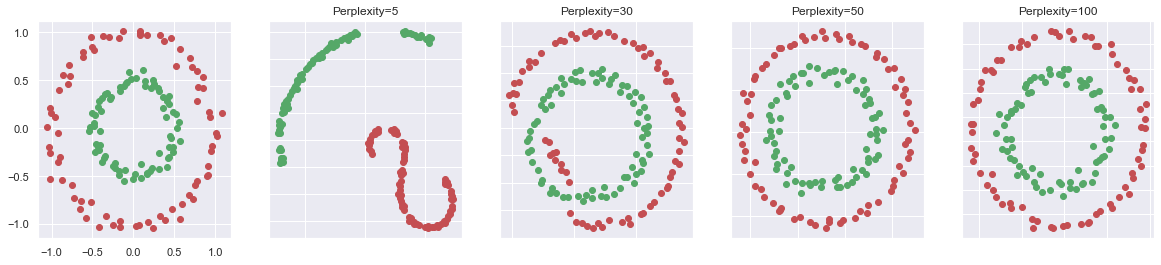

In [13]:
n_samples = 150
n_components = 2
fig, ax = plt.subplots( 1,5, figsize=(20, 4))
perplexities = [5, 30, 50, 100]
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)

ax[0].scatter(X[y == 0][:,0], X[y == 0][:,1], c="r")
ax[0].scatter(X[y == 1][:,0], X[y == 1][:,1], c="g")
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    t0 = time()

    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=5000,
    )

    Y = tsne.fit_transform(X)
    t1 = time()

    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax[i + 1].set_title("Perplexity=%d" % perplexity)
    ax[i + 1].scatter(Y[y == 0][:,0], Y[y == 0][:,1], c="r")
    ax[i + 1].scatter(Y[y == 1][:,0], Y[y == 1][:,1], c="g")
    ax[i + 1].xaxis.set_major_formatter(NullFormatter())
    ax[i + 1].yaxis.set_major_formatter(NullFormatter())
    ax[i + 1].axis("tight")

In [ ]:
# sau 5000 iter
# dataset dạng circle
# khi lựa chọn perplexity = 5 thì dataset well-separated
# với các perplexity càng lớn thì càng không hiệu quả trong việc chia dataset này

S-curve, perplexity=5 in 1.7 sec
S-curve, perplexity=30 in 0.35 sec
S-curve, perplexity=50 in 0.49 sec
S-curve, perplexity=100 in 0.36 sec


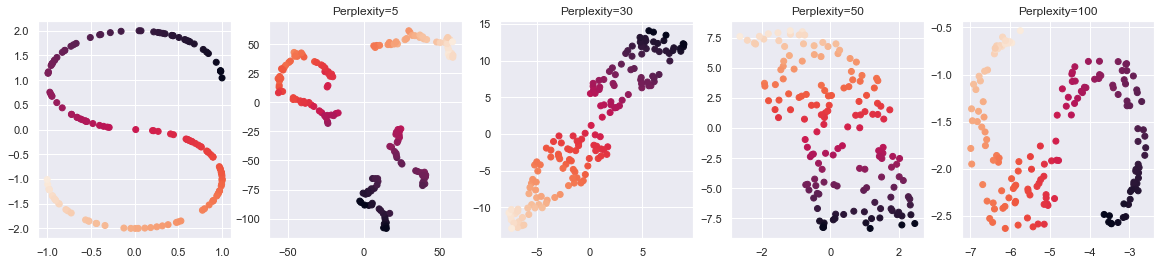

In [14]:
fig, ax = plt.subplots( 1,5, figsize=(20, 4))
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax[0].scatter(X[:, 0], X[:, 2], c=color)

for i, perplexity in enumerate(perplexities):

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=5000,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax[i + 1].set_title("Perplexity=%d" % perplexity)
    ax[i + 1].scatter(Y[:, 0], Y[:, 1], c=color)
    ax[i + 1].axis("tight")

In [ ]:
# với dataset này
# dataset dạng chữ S
# perplexity = 5 phân chia rất tốt
# càng tăng perplexity các data point có xu hướng cụm lại gần giống với dataset ban đầu

uniform grid, perplexity=5 in 1.6 sec
uniform grid, perplexity=30 in 0.34 sec
uniform grid, perplexity=50 in 0.46 sec
uniform grid, perplexity=100 in 0.37 sec


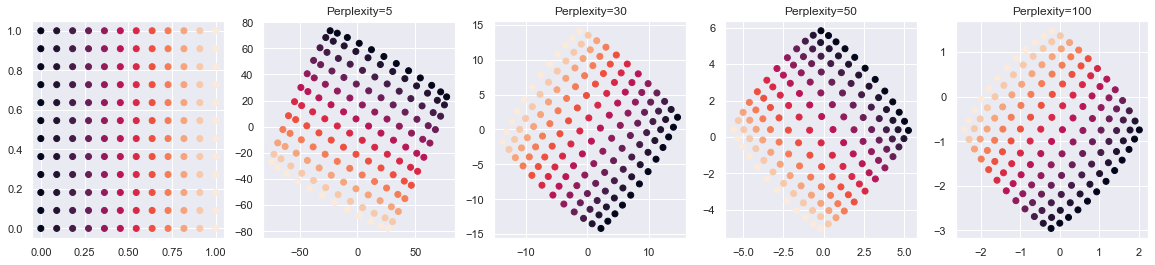

In [15]:
fig, ax = plt.subplots( 1,5, figsize=(20, 4))
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax[0].scatter(X[:, 0], X[:, 1], c=color)

for i, perplexity in enumerate(perplexities):
    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=5000,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax[i + 1].set_title("Perplexity=%d" % perplexity)
    ax[i + 1].scatter(Y[:, 0], Y[:, 1], c=color)
    ax[i + 1].axis("tight")


In [ ]:
# với dataset dạng uniform grid
# TNSE không hiệu quả trong việc phân chia dataset này
# việc tăng perplexity chỉ đơn giản xoay dataset

In [5]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('C:\\Users\\Duc\\Python Projects\\GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
keys = ['Python', 'Russia', 'financial', 'gas', 'war', 'Twitter', 'bachelor','university', 'college', 'election']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])

    embedding_clusters.append(embeddings)
    word_clusters.append(words)


In [7]:
df = pd.DataFrame(word_clusters).T
df.columns = keys
df

,Python,Russia,financial,gas,war,Twitter,bachelor,university,college,election
0,Jython,Ukraine,thefinancial,natural_gas,wars,twitter,bachelor_degree,universities,colleges,elections
1,Perl_Python,Moscow,finanical,oil,War,Twitter.com,Bachelor,faculty,university,Election
2,IronPython,Russian,fin_ancial,Gas,invasion,Facebook,bachelors_degree,unversity,school,electoral
3,scripting_languages,Belarus,Financial,gasoline,Persian_Gulf_War,tweet,master_degree,undergraduate,collegiate,reelection
4,PHP_Perl,Kremlin,economic,petroleum,Vietnam_War,tweets,bachelors,univeristy,undergraduate,parliamentary_elections
5,Java_Python,Kazakhstan,finances,ShaMaran_Petroleum,Iraq,Tweet,undergraduate_degree,campus,graduate_assistantship,eleciton
6,PHP,Russians,fiancial,hydrocarbon,unwinnable_quagmire,tweeting,Bachelors,college,col_lege,polls
7,Python_Ruby,Biologist_Anatoly_Kochnev,andfinancial,Ike_skews,un_winnable,Tweets,earned_bachelor_degree,academic,undergrad,elec_tion
8,Visual_Basic,Azerbaijan,fi_nancial,Liquified_natural,occupation,TwitterTwitter,Bachelor_Degree,professors,collge,Election_Day
9,Perl,Putin,banking,NIOB_interval_n,conflict,Tweeting,doctorate,undergraduates,Ivy_Leagues,byelection


In [8]:
# các từ có embedding gần nhau thường có mối liên hệ như từ đồng nghĩa, các từ hay được sử dụng trong 1 domain và sub-domain
# một số embedding là nhân vật, sự kiện gắn liền với từ gốc ban đầu (vd: Biologist_Anatoly_Kochnev của Russia)
# khi chọn 2 từ đồng nghĩa hoặc gần nghĩa nhau trong các từ gốc ban đầu thì sẽ tạo ra các embedding trùng nhau ( vd: university là embedding của college và ngược lại)

In [9]:
tsne_model_en_2d = manifold.TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

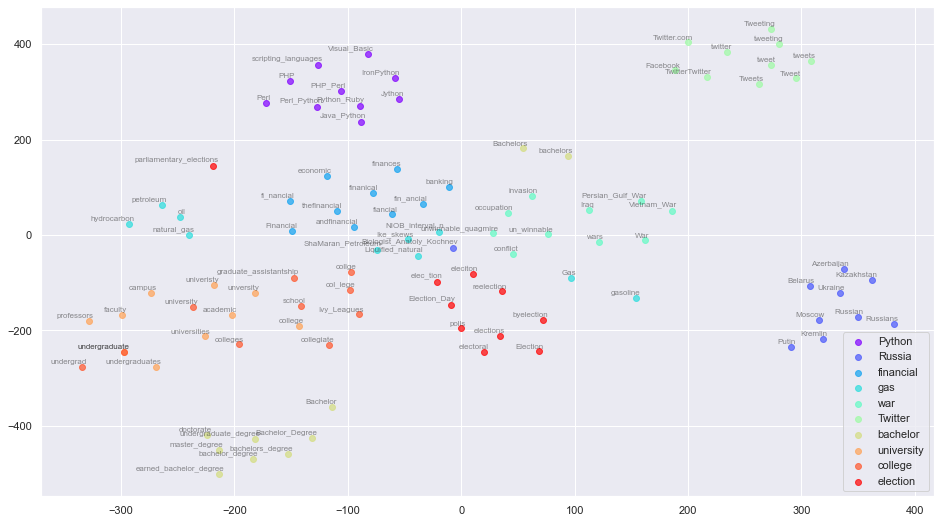

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

In [11]:
# các từ embedding độc lập về nghĩa khi project xuống 2D dimension thường tách biệt độc lập với nhau
# trong khi đó các từ có từ gốc gần nghĩa nhau như university hay college có các từ embedding nằm gần nhau trong 2D dimension mới